In [7]:
import pandas as pd
import nltk
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# Download the punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tango/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#

danish_stopwords.txt  thiele_chunker.ipynb	  thiele_legend_stories.csv
iframe_figures	      thiele_experiment_01.ipynb


Total number of chunks: 2597
Range of chunk lengths: 21 to 80
Average chunk length: 62.41 tokens
Max number of chunks for a story: 17
Number of stories with only 1 chunk: 152
Length of the shortest chunk among stories with only 1 chunk: 21
Shortest story length: 21 tokens
Longest story length: 1245 tokens
Average story length: 181.21 tokens
Total number of stories: 901


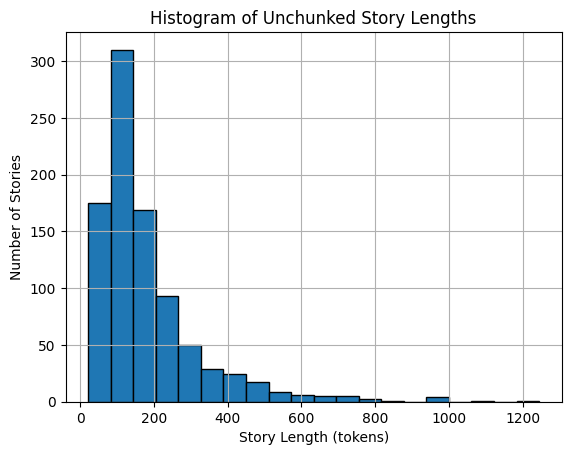

In [6]:
# Load the CSV file
input_file = './thiele_legend_stories.csv'  # Replace with your CSV file path
df = pd.read_csv(input_file, encoding='utf-8')

# Preprocessing function to clean and tokenize text
def preprocess_and_chunk(text, story_id):
    # Remove European quotation marks
    text = text.replace('»', '').replace('«', '')
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Calculate number of tokens
    num_tokens = len(tokens)
    
    # Define chunks
    chunks = []

    if num_tokens <= 50:
        chunks.append((f"{story_id}_1", ' '.join(tokens)))
    else:
        num_chunks = (num_tokens + 74) // 75  # ceil(num_tokens / 75)
        chunk_size = max(50, num_tokens // num_chunks)
        for i in range(0, num_tokens, chunk_size):
            chunk_tokens = tokens[i:i + chunk_size]
            chunks.append((f"{story_id}_{i // chunk_size + 1}", ' '.join(chunk_tokens)))
    
    # Ensure chunks are between 25 and 75 tokens
    final_chunks = []
    current_chunk = []
    
    for chunk_id, chunk_text in chunks:
        chunk_tokens = nltk.word_tokenize(chunk_text)
        if len(chunk_tokens) < 25:
            if final_chunks:
                final_chunks[-1] = (final_chunks[-1][0], final_chunks[-1][1] + " " + chunk_text)
            else:
                current_chunk.extend(chunk_tokens)
        else:
            if current_chunk:
                final_chunks.append((f"{story_id}_{len(final_chunks) + 1}", ' '.join(current_chunk).strip()))
                current_chunk = []
            final_chunks.append((chunk_id, chunk_text))
    
    if current_chunk:
        final_chunks.append((f"{story_id}_{len(final_chunks) + 1}", ' '.join(current_chunk).strip()))
    
    return final_chunks

# Initialize a list to store chunked data
chunked_data = []

# Initialize a dictionary to store story chunk counts
story_chunk_counts = {}

# Calculate lengths of unchunked stories
df['story_length'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Iterate over each row in the DataFrame and preprocess the text
for index, row in df.iterrows():
    story_id = row['story_id']
    chunks = preprocess_and_chunk(row['text'], story_id)
    story_chunk_counts[story_id] = len(chunks)
    for chunk_id, chunk_text in chunks:
        chunked_data.append({
            'id': chunk_id,
            'story_id': story_id,
            'vol': row['vol'],
            'sec': row['sec'],
            'sub': row['sub'],
            'title': row['title'],
            'text': chunk_text,
            'annot': row['annot']
        })

# Create a new DataFrame from the chunked data
chunked_df = pd.DataFrame(chunked_data)

# Save the new DataFrame to a CSV file
# output_file = './thiele_chunked_stories.csv'
# chunked_df.to_csv(output_file, index=False, encoding='utf-8')

# Calculate statistics for the unchunked stories
shortest_story_length = df['story_length'].min()
longest_story_length = df['story_length'].max()
average_story_length = df['story_length'].mean()
total_stories = df.shape[0]

# Print statistics
# print(f"Data successfully saved to {output_file}")
print(f"Total number of chunks: {total_chunks}")
print(f"Range of chunk lengths: {min_chunk_length} to {max_chunk_length}")
print(f"Average chunk length: {avg_chunk_length:.2f} tokens")
print(f"Max number of chunks for a story: {max_chunks_per_story}")
print(f"Number of stories with only 1 chunk: {stories_with_one_chunk}")
print(f"Length of the shortest chunk among stories with only 1 chunk: {shortest_single_chunk_length}")
print(f"Shortest story length: {shortest_story_length} tokens")
print(f"Longest story length: {longest_story_length} tokens")
print(f"Average story length: {average_story_length:.2f} tokens")
print(f"Total number of stories: {total_stories}")

# Plot histogram of unchunked story lengths
plt.hist(df['story_length'], bins=20, edgecolor='black')
plt.xlabel('Story Length (tokens)')
plt.ylabel('Number of Stories')
plt.title('Histogram of Unchunked Story Lengths')
plt.grid(True)
plt.show()

In [11]:
# Plot histogram of unchunked story lengths using Plotly
fig = px.histogram(df, x='story_length', nbins=40, title='Histogram of Unchunked Story Lengths',
                   labels={'story_length': 'Story Length (tokens)'}, marginal='box')
fig.update_layout(xaxis_title='Story Length (tokens)', yaxis_title='Number of Stories')
histogram_file = './unchunked_story_lengths_histogram.png'
pio.write_image(fig, histogram_file)

# Print the location where the histogram is saved
print(f"Histogram saved as {histogram_file}")

# Show the histogram
fig.show()

Histogram saved as ./unchunked_story_lengths_histogram.png


In [10]:
html_file = './unchunked_story_lengths_histogram.html'
pio.write_html(fig, file=html_file, auto_open=False)